<a href="https://colab.research.google.com/github/aonvara/python_dataviz2024/blob/main/HW_9_Group_SC_(643020095_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 30/10**

# **HW 9: การบ้านครั้งที่ 9**


---

รายวิชา Basic Programming for Data Science and Data Visualization

นางสาวมนัสนันท์ มีชำนาญ 643020090-1 (30/10/2567)

#**โจทย์**: HW9 present radar chart data india

##1. นำเข้าข้อมูลและจัดเตรียมข้อมูล

In [ ]:
#นำเข้าข้อมูลที่ใช้
import pandas
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
movie_df = pd.read_csv('/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv', encoding='latin-1')
print(movie_df.shape)
movie_df.head()

(15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## เลือก Actor 1 ที่แสดงหนังเป็นจำนวนมาก 2 อันดับแรก

In [87]:
movie_df1 = movie_df.dropna(subset=['Actor 1', 'Votes', 'Duration', 'Rating', 'Director', 'Genre'])
print(movie_df1.shape)
movie_df1.head()

(5746, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [69]:
# prompt: หา Actor 1 ที่แสดงหนังเป็นจำนวนมาก 2 อันดับแรก แล้วทำเป็นตาราง

import pandas as pd
actor1_counts = movie_df1['Actor 1'].value_counts()
top2_actors = actor1_counts.head(2)
top2_actors_df = pd.DataFrame({'Actor 1': top2_actors.index, 'Number of Movies': top2_actors.values})
print(top2_actors_df)


              Actor 1  Number of Movies
0    Amitabh Bachchan               104
1  Mithun Chakraborty                93


นักแสดงทั้ง 2 คนได้แก่ Amitabh Bachchan และ Mithun Chakraborty             

## จะเปรียบเทียบศักยภาพของนักแสดงทั้ง 2 คนได้แก่ Amitabh Bachchan และ Mithun Chakraborty โดยใช้ 5 ตัวชี้วัดได้แก่ Votes, Duration, Rating, จำนวนประเภทหนังทีเล่น และ จำนวนผู้กำกับที่เคยร่วมงาน

### 1. normalize ข้อมูล Votes ให้อยู่ในช่วง 1-10 ของ  Amitabh Bachchan และ Mithun Chakraborty

In [88]:
movie_df1['Duration'] = movie_df1['Duration'].str.replace('min', '')
movie_df1['Votes'] = movie_df1['Votes'].str.replace(',', '').astype(int)

<ipython-input-88-9034fad2a886>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df1['Duration'] = movie_df1['Duration'].str.replace('min', '')
<ipython-input-88-9034fad2a886>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df1['Votes'] = movie_df1['Votes'].str.replace(',', '').astype(int)


In [89]:
movie_df1.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [90]:
movie_df1['Duration'] = movie_df1['Duration'].str.strip().astype(float) # Convert 'Duration' column to numeric type, handling potential whitespace
actor1_stats = movie_df1.groupby('Actor 1').agg({'Rating': 'mean', 'Votes': 'mean', 'Duration': 'mean'})
print(actor1_stats)

                      Rating    Votes    Duration
Actor 1                                          
A. Muthu            3.300000    96.00  137.000000
A. Nairang          6.100000    22.00  140.000000
A.K. Hangal         6.200000   111.00  108.000000
A.S. Ravindra Babu  4.800000  1238.00  150.000000
Aachi Manorama      4.800000    12.00  165.000000
...                      ...      ...         ...
Zarina Wahab        2.600000     7.00  135.000000
Zayed Khan          4.575000   514.75  133.000000
Zeenat Aman         6.045455   152.00  139.363636
Zenia Starr         7.400000    24.00  119.000000
Zulfi Sayed         5.200000   136.50  164.000000

[2031 rows x 3 columns]


<ipython-input-90-6ae82e300e47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df1['Duration'] = movie_df1['Duration'].str.strip().astype(float) # Convert 'Duration' column to numeric type, handling potential whitespace


In [91]:
actor1_stats

,Rating,Votes,Duration
Actor 1,,,
A. Muthu,3.300000,96.00,137.000000
A. Nairang,6.100000,22.00,140.000000
A.K. Hangal,6.200000,111.00,108.000000
A.S. Ravindra Babu,4.800000,1238.00,150.000000
Aachi Manorama,4.800000,12.00,165.000000
...,...,...,...
Zarina Wahab,2.600000,7.00,135.000000
Zayed Khan,4.575000,514.75,133.000000
Zeenat Aman,6.045455,152.00,139.363636


In [106]:
# prompt: เปลี่ยน Actor 1 เป็น column

actor1_stats = actor1_stats.reset_index()


In [108]:
# prompt: เรียงตาราง actor1_stats จากมากไปน้อย

actor1_stats_sorted = actor1_stats.sort_values(by=['Votes', 'Rating', 'Duration'], ascending=[False, False, False])
actor1_stats_sorted


,index,Actor 1,Rating,Votes,Duration,Normalized Votes
1805,1805,Suraj Sharma,7.90,591417.0,127.0,10.000000
350,350,Ben Kingsley,8.00,220118.0,191.0,4.349640
172,172,Amole Gupte,8.40,175810.0,165.0,3.675368
474,474,Dev Patel,7.80,138287.0,120.5,3.104350
1176,1176,Owen Wilson,5.65,92827.5,84.0,2.412556
...,...,...,...,...,...,...
1437,1437,Rinku Jaiswal,5.80,5.0,116.0,1.000000
447,447,Debapriyo Bagchi,4.80,5.0,49.0,1.000000
1947,1947,Vije Bhatia,4.20,5.0,116.0,1.000000
1908,1908,Vaarssh Bhatnagar,3.60,5.0,131.0,1.000000


In [118]:
# Find the minimum and maximum Duration for Amitabh Bachchan and Mithun Chakraborty
min_vote = actor1_stats['Votes'].min()
max_vote = actor1_stats['Votes'].max()

# Normalize Duration for Amitabh Bachchan and Mithun Chakraborty within the range 1-10
actor_vote_df['Normalized Votes'] = (
    (actor_vote_df['Votes'] - min_vote) / (max_vote - min_vote) * 9 + 1
)

# Filter the DataFrame to include only Amitabh Bachchan and Mithun Chakraborty
actors_to_show = ['Amitabh Bachchan', 'Mithun Chakraborty']
filtered_df = actor1_stats[actor1_stats['Actor 1'].isin(actors_to_show)]

# Display the filtered DataFrame
filtered_df

,index,Actor 1,Rating,Votes,Duration,Normalized Votes,Normalized Rating
165,165,Amitabh Bachchan,6.183654,4088.673077,150.692308,1.062145,6.006149
1011,1011,Mithun Chakraborty,5.336559,540.150538,137.537634,1.008144,5.119655


### 2. normalize ข้อมูล Rating ให้อยู่ในช่วง 1-10 ของ Amitabh Bachchan และ Mithun Chakraborty

In [119]:
# Find the minimum and maximum Duration for Amitabh Bachchan and Mithun Chakraborty
min_rating = actor1_stats['Rating'].min()
max_rating = actor1_stats['Rating'].max()

# Normalize Duration for Amitabh Bachchan and Mithun Chakraborty within the range 1-10
actor1_stats['Normalized Rating'] = ( # Changed actor_Rating_df to actor1_stats
    (actor1_stats['Rating'] - min_rating) / (max_rating - min_rating) * 9 + 1
)

# prompt: โชว์เฉพาะข้อมูลของ Amitabh Bachchan และ Mithun Chakraborty

# Filter the DataFrame to include only Amitabh Bachchan and Mithun Chakraborty
actors_to_show = ['Amitabh Bachchan', 'Mithun Chakraborty']
filtered_df = actor1_stats[actor1_stats['Actor 1'].isin(actors_to_show)]

# Display the filtered DataFrame
filtered_df

,index,Actor 1,Rating,Votes,Duration,Normalized Votes,Normalized Rating
165,165,Amitabh Bachchan,6.183654,4088.673077,150.692308,1.062145,6.006149
1011,1011,Mithun Chakraborty,5.336559,540.150538,137.537634,1.008144,5.119655


### 3. normalize ข้อมูลจำนวนประเภทหนังที Amitabh Bachchan และ Mithun Chakraborty เล่นมีกี่ประเภท

In [ ]:
# prompt: สร้าง column ประเภทหนังเพิ่มเติมในตาราง top_director_df โดยยึดประเภทจากคำแรกใน column genre

# สร้างฟังก์ชันเพื่อดึงประเภทหนังจากคำแรกใน column genre
def get_main_genre(genre_str):
  genres = genre_str.split(', ')
  return genres[0]

# สร้าง column ใหม่ชื่อ 'main_Genre' โดยใช้ฟังก์ชัน get_main_genre
movie_df1['main_Genre'] = movie_df1['Genre'].apply(get_main_genre)
movie_df1.head()

<ipython-input-31-07d3dac7be9b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df1['main_Genre'] = movie_df1['Genre'].apply(get_main_genre)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Normalized Votes,Normalized Rating,main_Genre
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1.000533,7.913043,Drama
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1.007727,4.521739,Comedy
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1.218765,4.913043,Comedy
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,1.287778,8.434783,Drama
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,1.085268,6.086957,Horror


In [ ]:
# prompt: main_genre มีหนังทั้งหมดกี่ประเภท อะไรบ้าง

unique_genres = movie_df1['main_Genre'].unique()
num_unique_genres = len(unique_genres)

print("จำนวนประเภทหนังทั้งหมด:", num_unique_genres)
print("ประเภทหนังทั้งหมด:", unique_genres)


จำนวนประเภทหนังทั้งหมด: 20
ประเภทหนังทั้งหมด: ['Drama' 'Comedy' 'Horror' 'Action' 'Crime' 'Thriller' 'Adventure' 'Sport'
 'Biography' 'Documentary' 'Mystery' 'Musical' 'Romance' 'Fantasy'
 'Sci-Fi' 'Family' 'History' 'Animation' 'War' 'Music']


In [ ]:
# prompt: normalize ข้อมูลจำนวนประเภทหนังที Amitabh Bachchan และ Mithun Chakraborty เล่นมีกี่ประเภทให้อยู่ในช่วง 1-10 main_genre มีหนังทั้งหมด 20 ประเภท

# Create a DataFrame containing only the 'main_Genre' for Amitabh Bachchan and Mithun Chakraborty
actor_genre_df = movie_df1[movie_df1['Actor 1'].isin(['Amitabh Bachchan', 'Mithun Chakraborty'])][['Actor 1', 'main_Genre']]

# Count the number of unique genres for each actor
genre_counts = actor_genre_df.groupby('Actor 1')['main_Genre'].nunique()
print(f'ประเภทหนังที่เล่นทั้งหมด {genre_counts}')

# Normalize the genre counts within the range 1-10 based on the total number of genres (20)
max_genre_count = 20
genre_counts_normalized = (genre_counts / max_genre_count) * 9 + 1
print(f' Normalized ประเภทหนังที่เล่นทั้งหมด {genre_counts_normalized}')



ประเภทหนังที่เล่นทั้งหมด Actor 1
Amitabh Bachchan      10
Mithun Chakraborty     9
Name: main_Genre, dtype: int64
 Normalized ประเภทหนังที่เล่นทั้งหมด Actor 1
Amitabh Bachchan      5.50
Mithun Chakraborty    5.05
Name: main_Genre, dtype: float64


Amitabh Bachchan      5.50
Mithun Chakraborty    5.05

### 4. normalize ข้อมูลจำนวนผู้กำกับที่ Amitabh Bachchan และ Mithun Chakraborty เคยร่วมงาน

In [ ]:
# prompt: movie_df1 มีผู้กำกับทั้งหมดกี่คน

num_unique_directors = movie_df1['Director'].nunique()
print(f"movie_df1 มีผู้กำกับทั้งหมด {num_unique_directors} คน")


movie_df1 มีผู้กำกับทั้งหมด 2489 คน


In [ ]:
# prompt: normalize ข้อมูลจำนวนผู้กำกับที่ Amitabh Bachchan และ Mithun Chakraborty เคยร่วมงาน

# Create a DataFrame containing only the 'Director' for Amitabh Bachchan and Mithun Chakraborty
actor_director_df = movie_df1[movie_df1['Actor 1'].isin(['Amitabh Bachchan', 'Mithun Chakraborty'])][['Actor 1', 'Director']]

# Count the number of unique directors for each actor
director_counts = actor_director_df.groupby('Actor 1')['Director'].nunique()
print(f'จำนวนผู้กำกับที่เคยร่วมงาน {director_counts}')




จำนวนผู้กำกับที่เคยร่วมงาน Actor 1
Amitabh Bachchan      64
Mithun Chakraborty    59
Name: Director, dtype: int64


In [ ]:
# prompt: ข้อมูลจำนวนผู้กำกับที่ Actor 1 ใน movie_df1 เคยร่วมงาน มากที่สุด น้อยที่สุด

# Group by 'Actor 1' and count the number of unique directors for each actor
director_counts = movie_df1.groupby('Actor 1')['Director'].nunique()

# Find the maximum and minimum number of unique directors
max_directors = director_counts.max()
min_directors = director_counts.min()

print(f"ข้อมูลจำนวนผู้กำกับที่ Actor 1 เคยร่วมงาน มากที่สุด: {max_directors}")
print(f"ข้อมูลจำนวนผู้กำกับที่ Actor 1 เคยร่วมงาน น้อยที่สุด: {min_directors}")


ข้อมูลจำนวนผู้กำกับที่ Actor 1 เคยร่วมงาน มากที่สุด: 64
ข้อมูลจำนวนผู้กำกับที่ Actor 1 เคยร่วมงาน น้อยที่สุด: 1


In [ ]:
# Find the maximum number of unique directors among the two actors
max_director_count = director_counts.max()

# Normalize the director counts within the range 1-10 based on the maximum director count
director_counts_normalized = (director_counts / max_director_count) * 9 + 1
print(f' Normalized จำนวนผู้กำกับที่เคยร่วมงาน {director_counts_normalized}')

 Normalized จำนวนผู้กำกับที่เคยร่วมงาน Actor 1
Amitabh Bachchan      10.000000
Mithun Chakraborty     9.296875
Name: Director, dtype: float64


### 5. normalize Duration ของ Amitabh Bachchan และ Mithun Chakraborty

In [120]:
# Find the minimum and maximum Duration for Amitabh Bachchan and Mithun Chakraborty
min_Duration = actor1_stats['Duration'].min()
max_Duration = actor1_stats['Duration'].max()

# Normalize Duration for Amitabh Bachchan and Mithun Chakraborty within the range 1-10
actor1_stats['Normalized Duration'] = ( # Changed actor_Rating_df to actor1_stats
    (actor1_stats['Duration'] - min_Duration) / (max_Duration - min_Duration) * 9 + 1
)

# prompt: โชว์เฉพาะข้อมูลของ Amitabh Bachchan และ Mithun Chakraborty

# Filter the DataFrame to include only Amitabh Bachchan and Mithun Chakraborty
actors_to_show = ['Amitabh Bachchan', 'Mithun Chakraborty']
filtered_df = actor1_stats[actor1_stats['Actor 1'].isin(actors_to_show)]

# Display the filtered DataFrame
filtered_df

,index,Actor 1,Rating,Votes,Duration,Normalized Votes,Normalized Rating,Normalized Duration
165,165,Amitabh Bachchan,6.183654,4088.673077,150.692308,1.062145,6.006149,5.183623
1011,1011,Mithun Chakraborty,5.336559,540.150538,137.537634,1.008144,5.119655,4.759279


Amitabh Bachchan      6.232249
Mithun Chakraborty    5.473325

### 6. Radar

1.   Votes : Amitabh Bachchan 1.062145 Mithun Chakraborty 1.008144
2.   Rating : Amitabh Bachchan 6.006149 Mithun Chakraborty 5.119655
3.   Genre : Amitabh Bachchan 5.50 Mithun Chakraborty 5.05
4.   Director : Amitabh Bachchan      10.000000 Mithun Chakraborty    9.296875
5.  Duration : Amitabh Bachchan      5.183623 Mithun Chakraborty    4.759279



In [121]:
data = {'client_id' : ['Amitabh Bachchan' , 'Mithun Chakraborty'],
         'Votes' : [1.06, 1.00],
         'Rating' : [ 6.00, 5.11],
         'Genre' : [5.50, 5.05],
        'Director' : [10.00, 9.29],
       'Duration' : [5.18, 4.75]}
df = pd.DataFrame.from_dict(data)
df

,client_id,Votes,Rating,Genre,Director,Duration
0,Amitabh Bachchan,1.06,6.00,5.50,10.00,5.18
1,Mithun Chakraborty,1.00,5.11,5.05,9.29,4.75


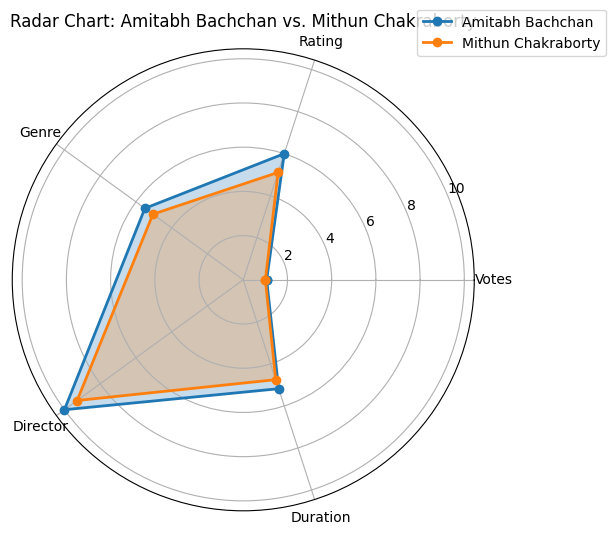

In [123]:
# prompt: สร้างกราฟ radar จาก data ให้ช่วงของกราฟคือ 1-10

import matplotlib.pyplot as plt
import numpy as np

categories = ['Votes', 'Rating', 'Genre', 'Director', 'Duration']
values_amitabh = [1.06, 6.00, 5.50, 10.00, 5.18]
values_mithun = [1.00, 5.11, 5.05, 9.29, 4.75]

labels = np.array(categories)
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

values_amitabh += values_amitabh[:1]
values_mithun += values_mithun[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values_amitabh, 'o-', linewidth=2, label='Amitabh Bachchan')
ax.fill(angles, values_amitabh, alpha=0.25)
ax.plot(angles, values_mithun, 'o-', linewidth=2, label='Mithun Chakraborty')
ax.fill(angles, values_mithun, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Radar Chart: Amitabh Bachchan vs. Mithun Chakraborty')
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()
